## 範例重點

學習在訓練開始前檢查各個環節

1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

## GPU 使用情況

以下為在 Linux 的指令，若是在 Windows，請參考[連結](https://blog.csdn.net/idwtwt/article/details/78017565)。

In [1]:
# !nvidia-smi

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 準備資料

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)) / 255.
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [5]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [6]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [7]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 定義模型

In [8]:
def build_model(x, input_shape, output_units, neuron_numbers=()):
    main_input, hidden_layer = Input(shape=input_shape, name='main_input'), None
    for i, neuron_number in enumerate(neuron_numbers):
        dense_layer = Dense(units=neuron_number, activation='relu', name=f'hidden_layer{i}')
        hidden_layer = dense_layer(hidden_layer) if hidden_layer is not None else dense_layer(main_input)
    main_output = Dense(units=output_units, activation='softmax', name='main_output')(hidden_layer)
    return Model(inputs=[main_input], outputs=[main_output])

In [9]:
model = build_model(X_train, (X_train.shape[-1],), 10, neuron_numbers=(512, 256, 128,))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
main_output (Dense)          (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

In [10]:
## 設定超參數
epochs = 100
batch_size = 256
learning_rate = 0.001

## 設定優化器
optimizer = Adam(lr=learning_rate)

In [11]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test,),
                          shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 20s - loss: 1.9240 - acc: 0.3064 - val_loss: 1.7347 - val_acc: 0.3819
Epoch 2/100
 - 15s - loss: 1.6958 - acc: 0.3922 - val_loss: 1.7040 - val_acc: 0.4008
Epoch 3/100
 - 15s - loss: 1.6121 - acc: 0.4238 - val_loss: 1.5954 - val_acc: 0.4327
Epoch 4/100
 - 15s - loss: 1.5596 - acc: 0.4423 - val_loss: 1.5708 - val_acc: 0.4424
Epoch 5/100
 - 16s - loss: 1.5060 - acc: 0.4608 - val_loss: 1.4887 - val_acc: 0.4754
Epoch 6/100
 - 15s - loss: 1.4637 - acc: 0.4793 - val_loss: 1.4806 - val_acc: 0.4731
Epoch 7/100
 - 14s - loss: 1.4319 - acc: 0.4888 - val_loss: 1.5128 - val_acc: 0.4623
Epoch 8/100
 - 14s - loss: 1.4027 - acc: 0.4997 - val_loss: 1.4811 - val_acc: 0.4730
Epoch 9/100
 - 14s - loss: 1.3744 - acc: 0.5123 - val_loss: 1.4999 - val_acc: 0.4688
Epoch 10/100
 - 14s - loss: 1.3435 - acc: 0.5221 - val_loss: 1.4200 - val_acc: 0.4919
Epoch 11/100
 - 14s - loss: 1.3269 - acc: 0.5261 - val_loss: 1.3790 - val_acc: 0.5077
Epoch 12/100


Epoch 96/100
 - 15s - loss: 0.2865 - acc: 0.8973 - val_loss: 3.0470 - val_acc: 0.5028
Epoch 97/100
 - 15s - loss: 0.2981 - acc: 0.8922 - val_loss: 3.0944 - val_acc: 0.4957
Epoch 98/100
 - 15s - loss: 0.2804 - acc: 0.8994 - val_loss: 3.0490 - val_acc: 0.5077
Epoch 99/100
 - 16s - loss: 0.2862 - acc: 0.8980 - val_loss: 3.1305 - val_acc: 0.4998
Epoch 100/100
 - 15s - loss: 0.2696 - acc: 0.9046 - val_loss: 3.1807 - val_acc: 0.5032


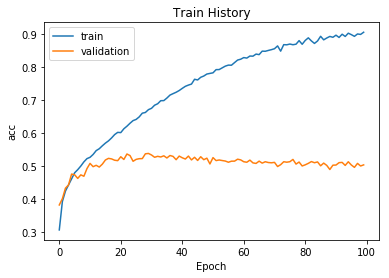

In [13]:
show_train_history(train_history, 'acc', 'val_acc')

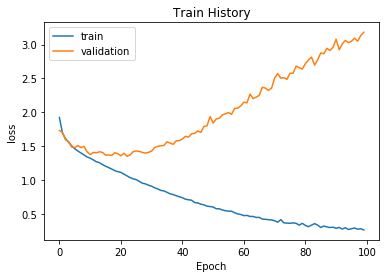

In [14]:
show_train_history(train_history, 'loss', 'val_loss')

## 作業

1. 請嘗試將資料前處理方式替換成以 min/max 調整後再進行標準化至 -1 ~ 1 間。
2. 請嘗試將 MLP 疊更深(e.g. 5 ~ 10 層)，進行訓練後觀察 learning curve 的走勢。
3. Optional: 請改用 GPU 進行訓練(如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度。